In [1]:
import pandas as pd
import numpy as np
import graphviz
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from metadata.const import features, class_label, dtypes

In [2]:
df = pd.read_csv('dataset/clean-sample-200000.csv', dtype=dtypes)
df = shuffle(df)

<AxesSubplot:>

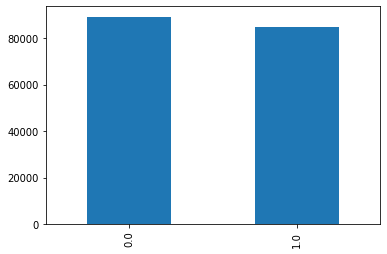

In [3]:
df[class_label].value_counts().plot(kind='bar')

In [4]:
X = df.drop(class_label, axis=1)
y = df[class_label]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

In [6]:
clf = tree.DecisionTreeClassifier(min_samples_split=20)
clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

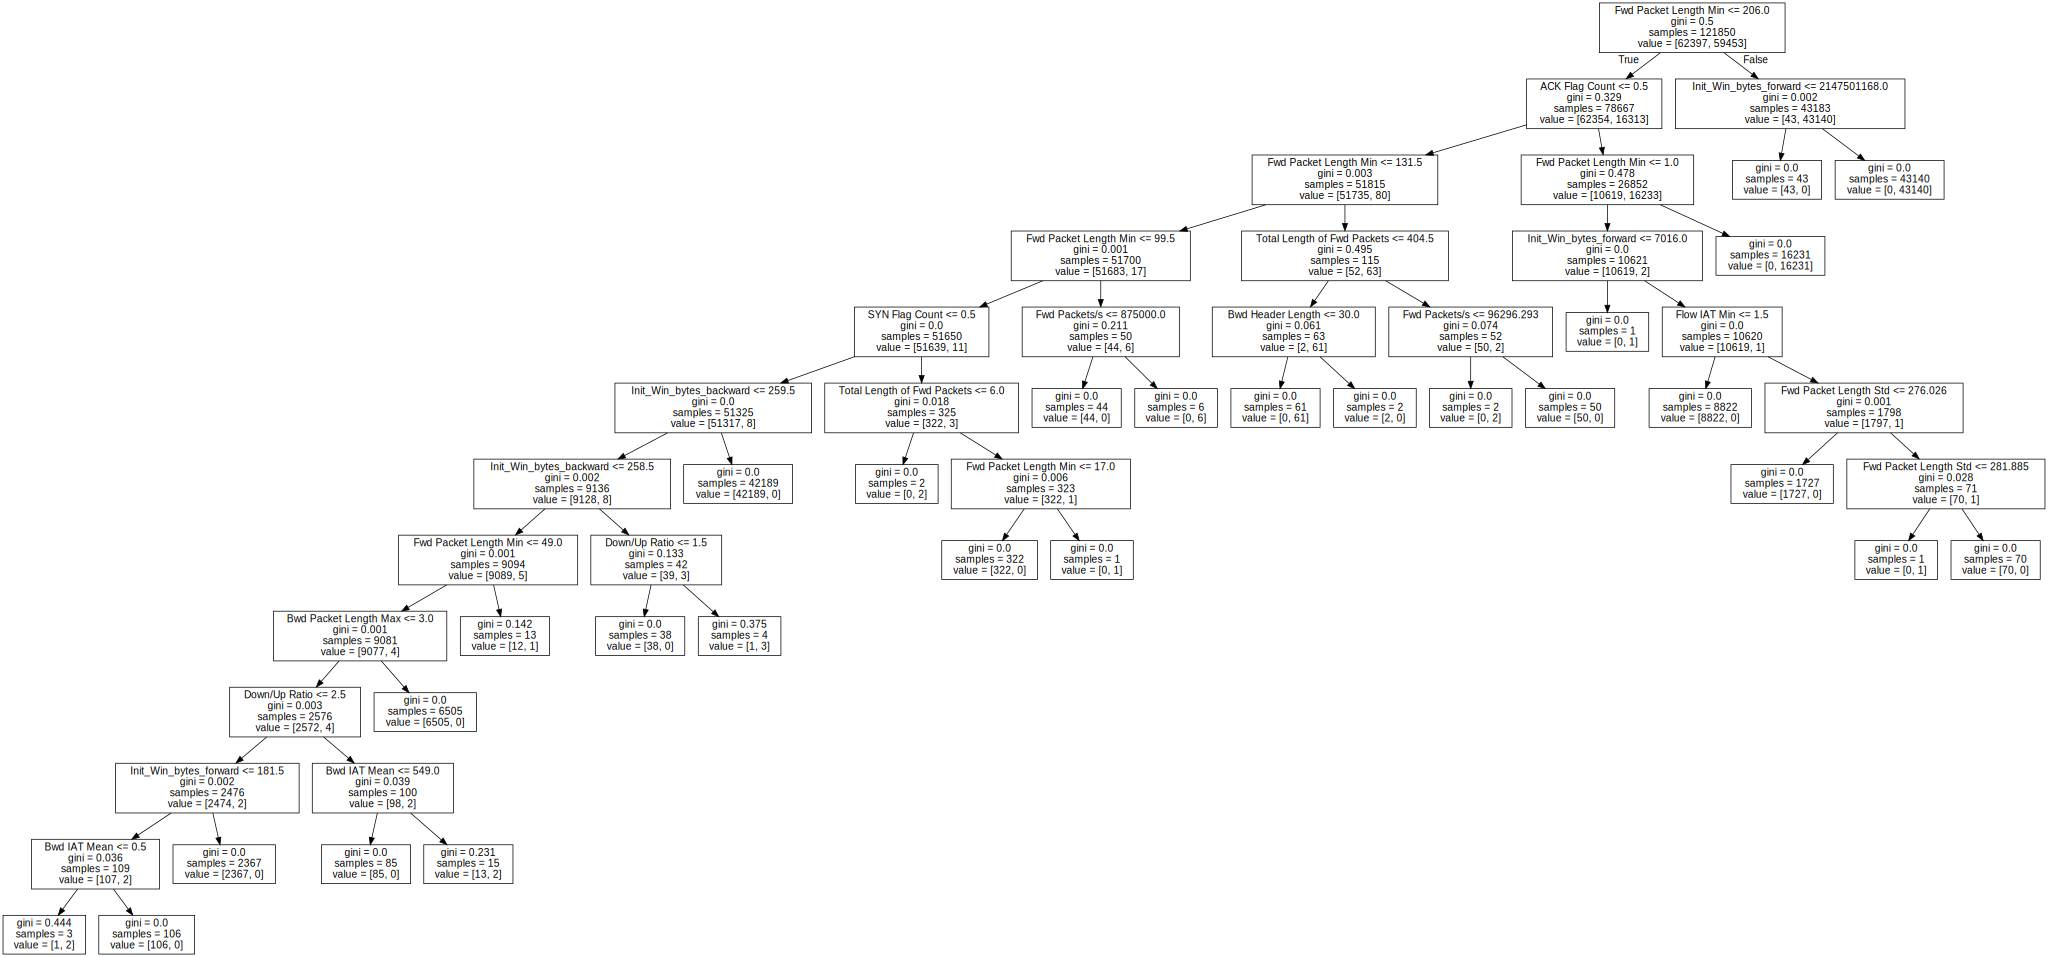

In [7]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X.columns.tolist())
graph = graphviz.Source(dot_data)
graph.render(filename='decision-tree')
graph

In [8]:
score = clf.score(X_test, y_test)
print(score)

0.9998659568764122


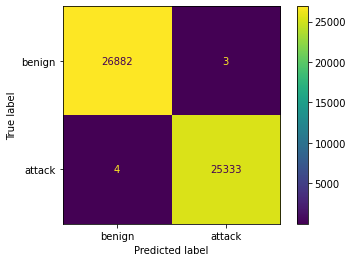

In [9]:
cm = confusion_matrix(y_test, clf.predict(X_test))
cmd = ConfusionMatrixDisplay(cm, display_labels=['benign','attack'])
cmd.plot()

In [10]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26885
         1.0       1.00      1.00      1.00     25337

    accuracy                           1.00     52222
   macro avg       1.00      1.00      1.00     52222
weighted avg       1.00      1.00      1.00     52222



In [11]:
print(clf.get_depth())

12


In [12]:
top_features = []
for i in range(len(clf.feature_importances_)):
    top_features.append((clf.feature_importances_[i], X.columns[i]))
top_features.sort(reverse=True)
for f in top_features:
    print(f[1], "\t\t\t", f[0])

 Fwd Packet Length Min 			 0.7859657295895419
 ACK Flag Count 			 0.2112558961724957
Init_Win_bytes_forward 			 0.001445172472037063
Total Length of Fwd Packets 			 0.0008739228664885482
Fwd Packets/s 			 0.00023662695166719907
 Down/Up Ratio 			 6.803793566529469e-05
 Bwd Header Length 			 6.361586510719497e-05
 Bwd IAT Mean 			 5.004173780050497e-05
 Fwd Packet Length Std 			 3.28325448341997e-05
 Init_Win_bytes_backward 			 7.0888060100058075e-06
 SYN Flag Count 			 8.737190878726952e-07
Bwd Packet Length Max 			 1.4616180763743925e-07
 Flow IAT Min 			 1.5177456813003512e-08
Fwd PSH Flags 			 0.0
Active Mean 			 0.0
 URG Flag Count 			 0.0
 Total Fwd Packets 			 0.0
 Total Backward Packets 			 0.0
 Idle Std 			 0.0
 Fwd Packet Length Max 			 0.0
 Fwd Header Length 			 0.0
 Flow IAT Mean 			 0.0
 Flow Duration 			 0.0
 CWE Flag Count 			 0.0
 Bwd Packets/s 			 0.0
 Bwd Packet Length Min 			 0.0
 Bwd IAT Min 			 0.0
 Active Std 			 0.0
